In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as sm

In [0]:
from sklearn import datasets
iris = datasets.load_iris()


In [0]:
X = pd.DataFrame(iris.data ,  columns = ['sepal_length' , 'sepal_width' , 'petal_length' , 'petal_width' ])
Y = pd.DataFrame(iris.target , columns = ["targets"])

In [46]:
print (X.head())

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


Text(0.5, 1.0, 'Petal')

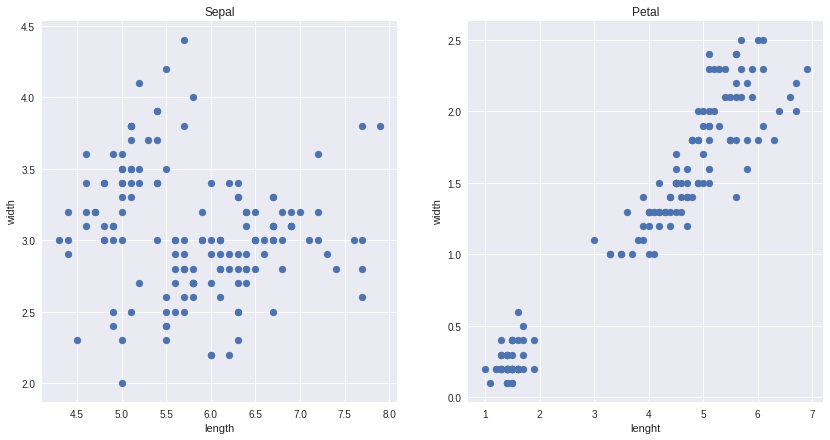

In [47]:
# plotting the figures 
plt.figure(figsize = (14,7))
# creating subplots 
# 1st subplot 1 row 2 columns
plt.subplot(1,2,1) 
plt.scatter(X.sepal_length , X.sepal_width)
plt.xlabel('length')
plt.ylabel('width')
plt.title('Sepal')
# 2nd subplot 1 row 2 columns
plt.subplot(1,2,2)
plt.scatter(X.petal_length , X.petal_width)
plt.xlabel('lenght')
plt.ylabel('width')
plt.title('Petal')

In [48]:
print (X.describe())
# preprocessing the data 
from sklearn.preprocessing import StandardScaler 
X_std = StandardScaler().fit_transform(X)


       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [0]:
# print (X_std)

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [0]:
scaler =  StandardScaler()
pca = PCA()

4
range(0, 4)


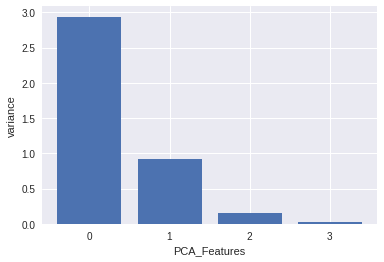

In [50]:
X_norm = scaler.fit_transform(X)
pca.fit(X_norm)
print (pca.n_components_)
# extracted number of features are used in range()
features = range(0 , pca.n_components_)
print (features)
# the amount of variance explained by each of selected components
plt.bar(features , pca.explained_variance_)
plt.xlabel('PCA_Features')
plt.ylabel('variance')
# pyplot.xticks is important for getting the range of features to 4
plt.xticks(features)
plt.show()

In [0]:
# choosing the intrinsic dimension in PCA, is given by number of features with significant variance 
# thus here out of 4, we have only 2 intrinsic dimension 
# now we have found the intrinsic dimensions as 2, we use PCA for dimension reduction of the dataset, reataining only 2 most important features
pca =  PCA(n_components = 2)
# pca with 2 components
pca.fit(X_norm)
# fir PCA instance to scaled samples 
pca_features = pca.transform(X_norm)
# transform the scaled samples 

In [52]:
print (pca_features.shape)

(150, 2)


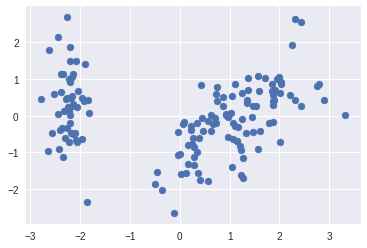

In [53]:
plt.scatter(pca_features[:,0] , pca_features[:,1])

   sepal_length  sepal_width  petal_length  petal_width
0     -0.900681     1.019004     -1.340227    -1.315444
1     -1.143017    -0.131979     -1.340227    -1.315444
2     -1.385353     0.328414     -1.397064    -1.315444
3     -1.506521     0.098217     -1.283389    -1.315444
4     -1.021849     1.249201     -1.340227    -1.315444


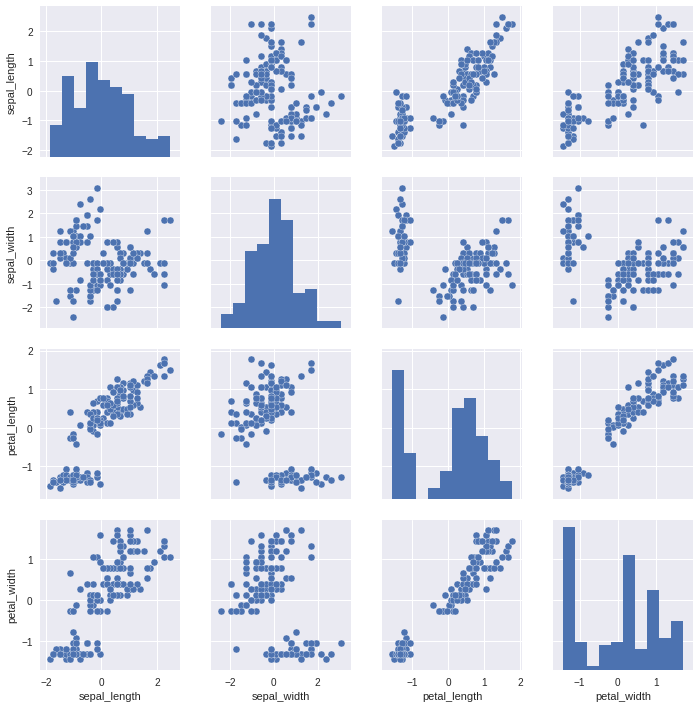

In [57]:
# plotting the pairplot
import seaborn as sns
X_new = pd.DataFrame(X_norm , columns = ['sepal_length' , 'sepal_width' , 'petal_length' , 'petal_width' ])
print (X_new.head())
sns.pairplot(X_new)

In [67]:
# kmeans clustering 
# we are starting with three clusters 
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X_new)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [68]:
labels = kmeans.labels_
print (labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2
 2 1 1 1 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 1 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


In [70]:
# inspecting the clusters
model = KMeans(n_clusters = 3)
# fit_predict is used when we are predicting on unlabelled data while fit is used on labelled data
# fit performs clustering while fir_predict gives your cluster labels
labels = model.fit_predict(pca_features)
print (labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 0 2 2
 0 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [78]:
species_dict = dict(zip(range(0,3), iris.target_names))
print (species_dict)
iris_species = list(map(lambda x : species_dict[x] , iris.target))
# map all the values predicta target values to target
df = pd.DataFrame({'labels': labels , 'species' : iris_species})
df.head()

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}


,labels,species
0,1,setosa
1,1,setosa
2,1,setosa
3,1,setosa
4,1,setosa


In [80]:
ct = pd.crosstab(df['labels'] , df['species'])
ct

species,setosa,versicolor,virginica
labels,,,
0,0,39,16
1,50,0,0
2,0,11,34


In [0]:
# measuring the quality of clusters
# in means we try to minimise the inertia 
ks = range(1,6)
model_inertia =[]
for k in ks:
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(pca_features)
  model_inertia.append(kmeans.inertia_)

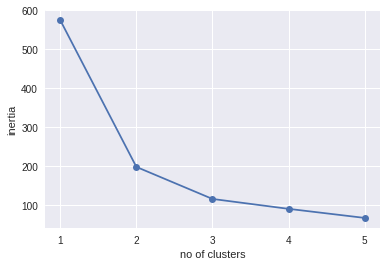

In [87]:
plt.plot(ks,model_inertia, '-o')
plt.xlabel('no of clusters')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()